# From Last Time: Generalized Advantage Estimate and TD

<font size="3">The advantage function, A, is the expected return of a state (value) subtracted from the expected return given an action in a state.

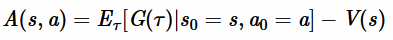
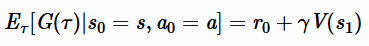
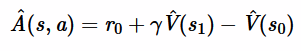
<font size="1">Temporal Difference (TD) estimate for the advantage function
    
<font size="3">Note that this estimator is highly reliant on the value function estimator. If this has high bias, then the TD estimate will also have high bias!

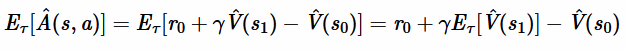

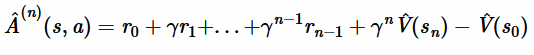


<font size="3">Doing this reduces the bias since we increase the proportion of terms from the full advantage function not reliant on the value function estimate, and we scale the magnitude of the value estimate of the nth state by a much smaller number.

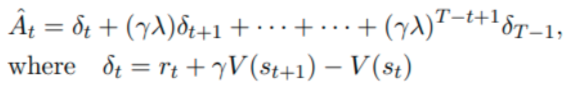
    
λ this is the lever to control the bias variance trade-off!

# Q (Action-Value Function) Learning 

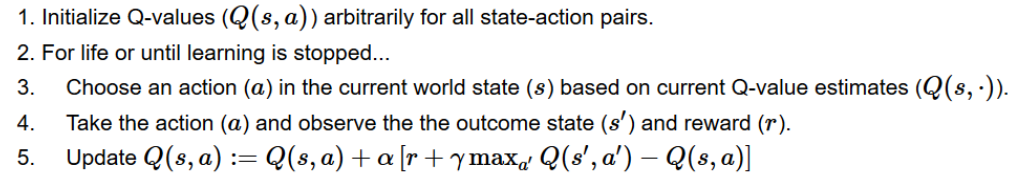

# Q-lookup Table

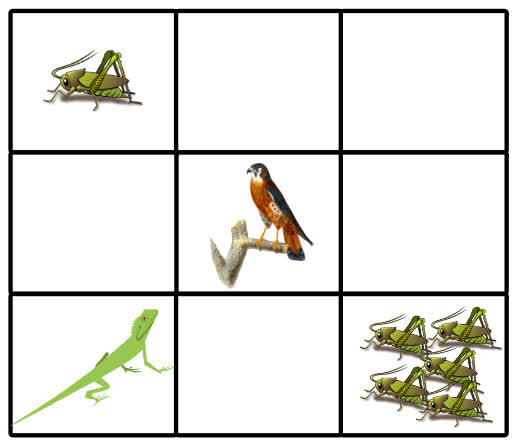

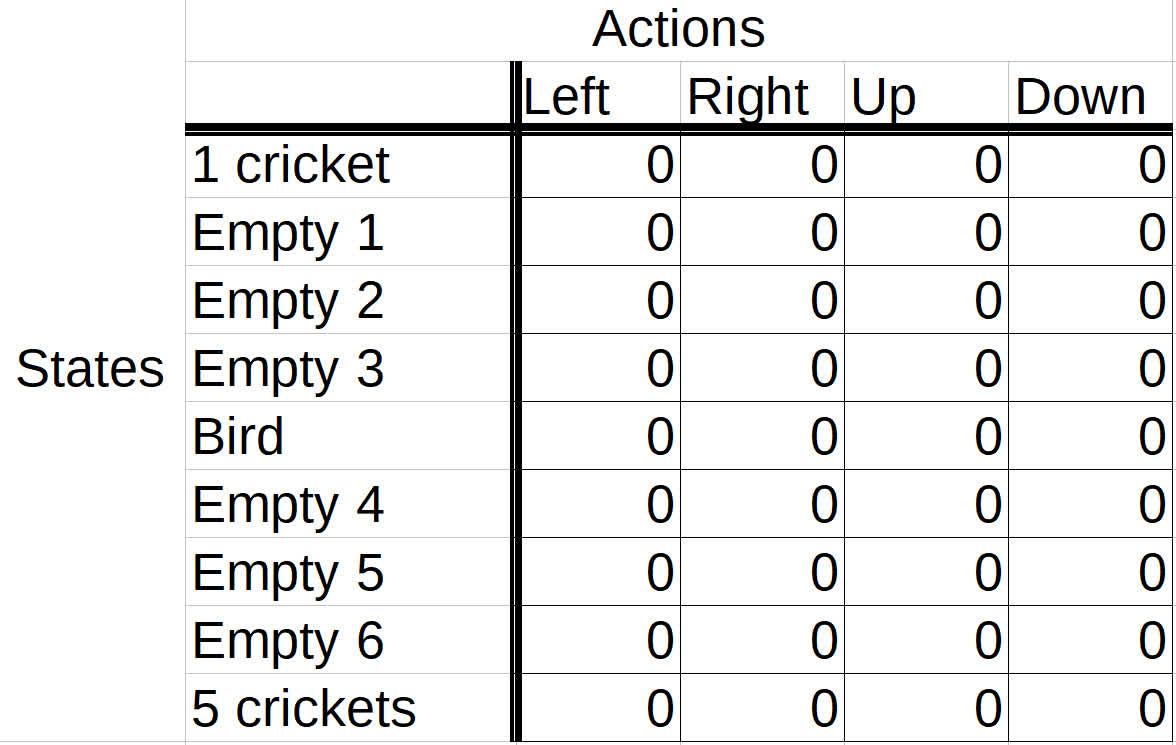
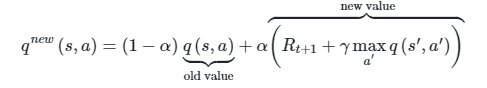
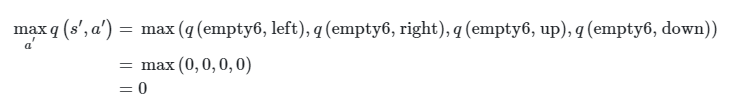

In [1]:
import numpy as np
import gym
import random

env = gym.make("FrozenLake-v1")

action_size = env.action_space.n
state_size = env.observation_space.n


qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [2]:
total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

# Crux

In [11]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(qtable)

Score over time: 0.49273333333333336
[[0.334928 0.043534 0.049019 0.041026]
 [0.000279 0.007131 0.014438 0.206266]
 [0.008167 0.013995 0.036839 0.014716]
 [0.000068 0.000216 0.001164 0.018320]
 [0.424327 0.069093 0.031755 0.064521]
 [0.000000 0.000000 0.000000 0.000000]
 [0.007298 0.000000 0.000010 0.000018]
 [0.000000 0.000000 0.000000 0.000000]
 [0.002910 0.103255 0.122768 0.667245]
 [0.004424 0.263711 0.037229 0.043074]
 [0.060729 0.003509 0.007325 0.004074]
 [0.000000 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 0.000000]
 [0.004951 0.002894 0.598243 0.000008]
 [0.330797 0.757180 0.180578 0.211113]
 [0.000000 0.000000 0.000000 0.000000]]


# Playing

In [12]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 47
****************************************************
EPISODE  1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 36
****************************************************
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 22
****************************************************
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 72
****************************************************
EPISODE  4
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 12


# Lets go Deep!

<font size="3">But the question is why go deep at all?

Simple answer is imagine the Q-look up table for some sophisticated game like some Atari game or Dota 2. States maybe pixels on screen and agent can perform multiple tasks. So, it will become computationally expensive and infeasible.

But fret not, my friends. We can go deep!

In essence, we are trying to find optimal Q-function. So, we can use some sort of function approximator to estimate the Q-function.
    
What's better than the universal function approximator a.k.a Neural Networks</font>

# Deep Q Networks: DQN

## 1. Birds Eye View

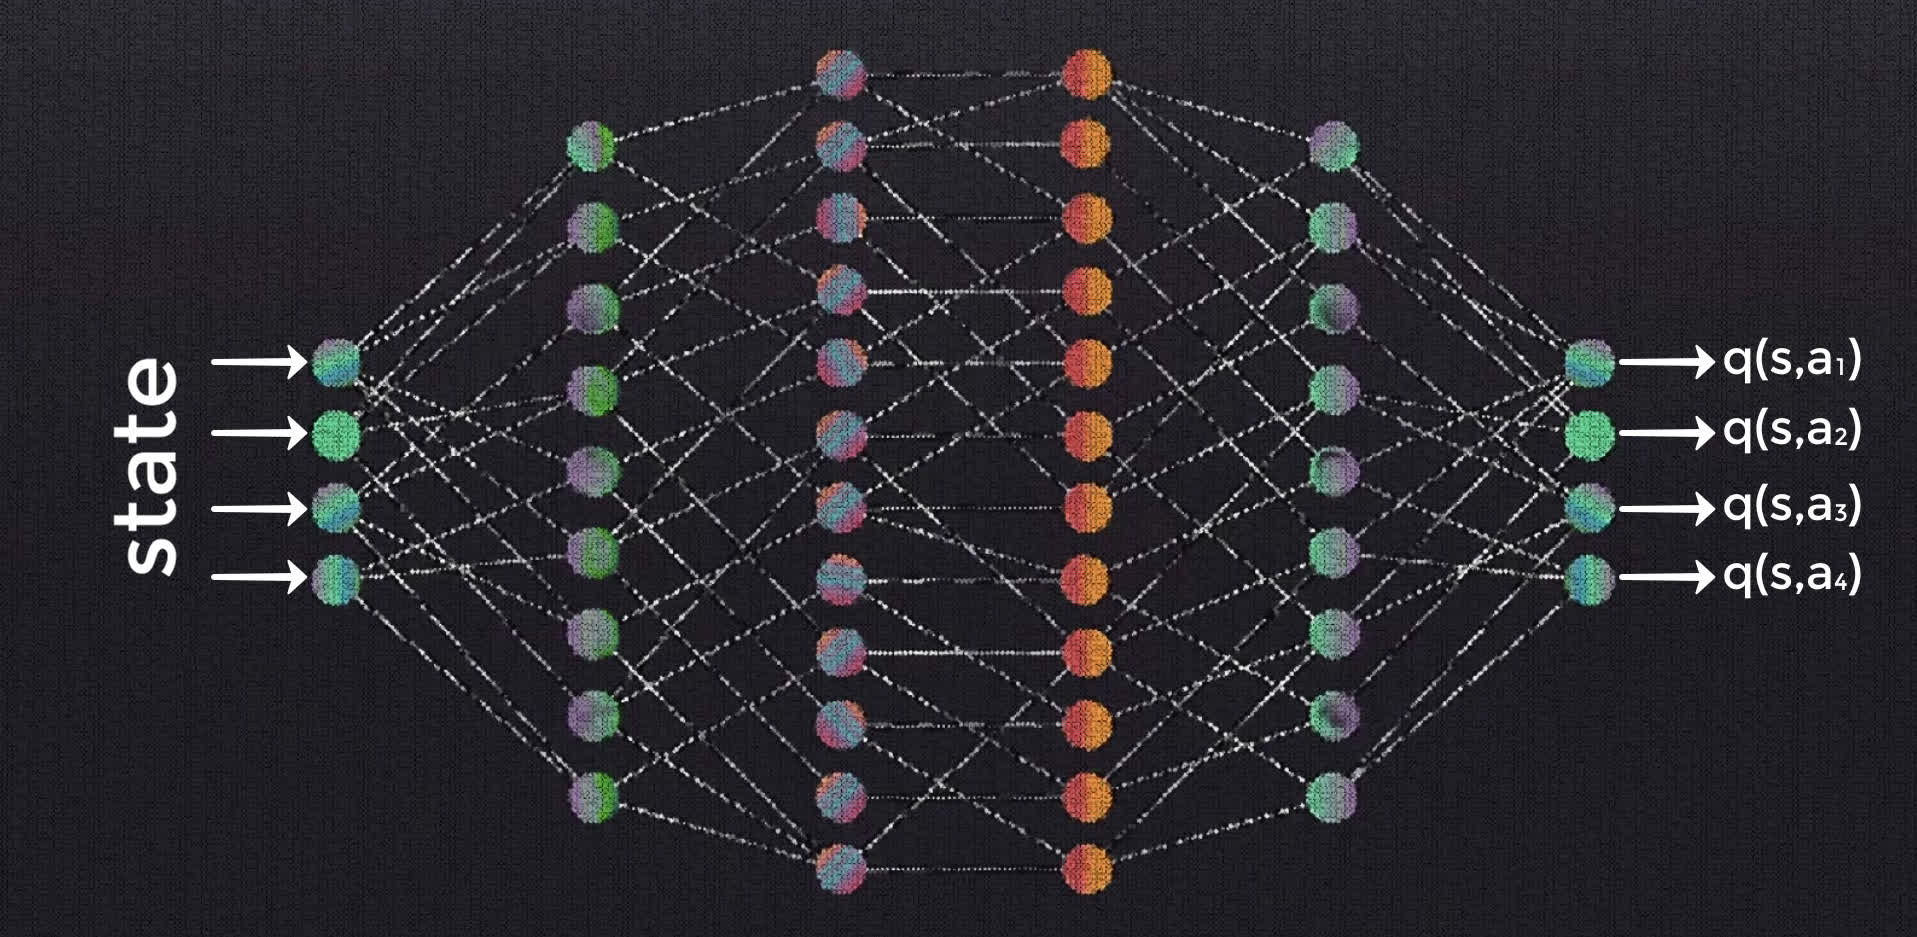

<font size="3">Input: States \
Output: Estimated Q-Values for each action \
Goal: Approximating optimal Q-function, which is given by Bellman Optimality \begin{eqnarray*} q_{\ast }\left( s,a\right) &=&E\left[ R_{t+1}+\gamma \max_{a^{\prime }}q_{\ast }\left( s^\prime,a^{\prime }\right)\right] \end{eqnarray*}
    
    
The loss from the network is calculated by comparing the outputted Q-values to the target Q-values from the right hand side of the Bellman equation, and as with any network, the objective here is to minimize this loss. 

    
\begin{eqnarray*} q_{\ast }\left( s,a\right) - q(s,a)&=&loss \\E\left[ R_{t+1}+\gamma \max_{a^{\prime }}q_{\ast }\left( s^\prime,a^{\prime }\right)\right] - E\left[ \sum_{k=0}^{\infty }\gamma ^{k}R_{t+k+1}\right]&=&loss \end{eqnarray*}

<font size="3">Layers: Usual layers in Neural Networks like Convolutional Layers, with some non-linear activation function plus maybe fully connected layers.

### Example of Input (States, which are still frames from Atari Breakout) to DQN

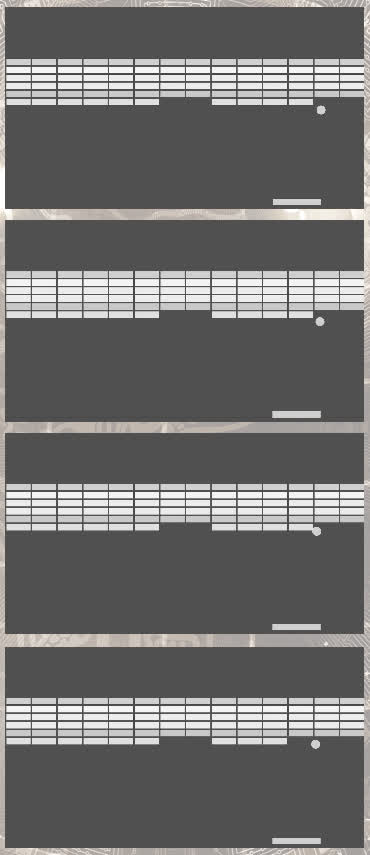

## 2. Experience Replay and Reply Memory

<font size="3"> Experience Replay is a technique used for training the network.\
With experience replay, we store the agent's experiences at each time step in a data set called the replay memory. \
Experience of an agent at time t is defined by this tuple:
$e_t=(s_t,a_t,r_{t+1},s_{t+1})$


<font size="3">All of the agent's experiences at each time step over all episodes played by the agent are stored in the replay memory, a finite data set D, say storing N experiences.

<font size="4"> We will sample randomly from Reply Memory to train our network.\
<font size="3">But, why? Why not taking sequential experiences as they occur in environments.

In short, to break the strong correlations between sequential samples.
    
This whole process is known as experience replay

## 3. Setting up our DQN

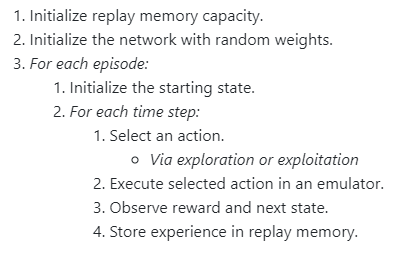

## 4. Understanding working of the Policy Network and Targert Network

<font size="3">To start training, sample a random batch of experiences from replay memory.
    
For understanding, lets just take single sample

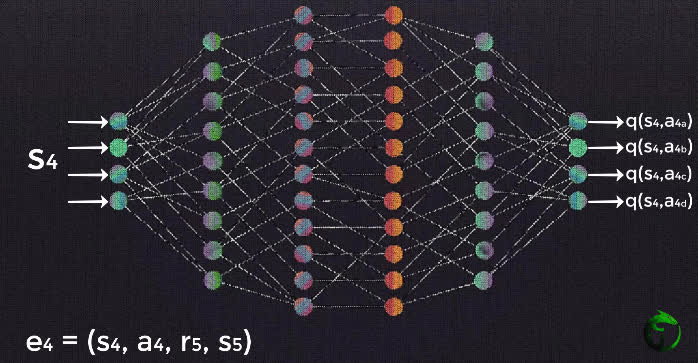

<font size="3">Now what?

Ahh, yes. The loss function: \begin{eqnarray*} q_{\ast }\left( s,a\right) - q(s,a)&=&loss \\E\left[ R_{t+1}+\gamma \max_{a^{\prime }}q_{\ast }\left( s^\prime,a^{\prime }\right)\right] - E\left[ \sum_{k=0}^{\infty }\gamma ^{k}R_{t+k+1}\right]&=&loss \end{eqnarray*}

<font size="3">How to calculate the left term, the target Q-value (From Bellman Equation)

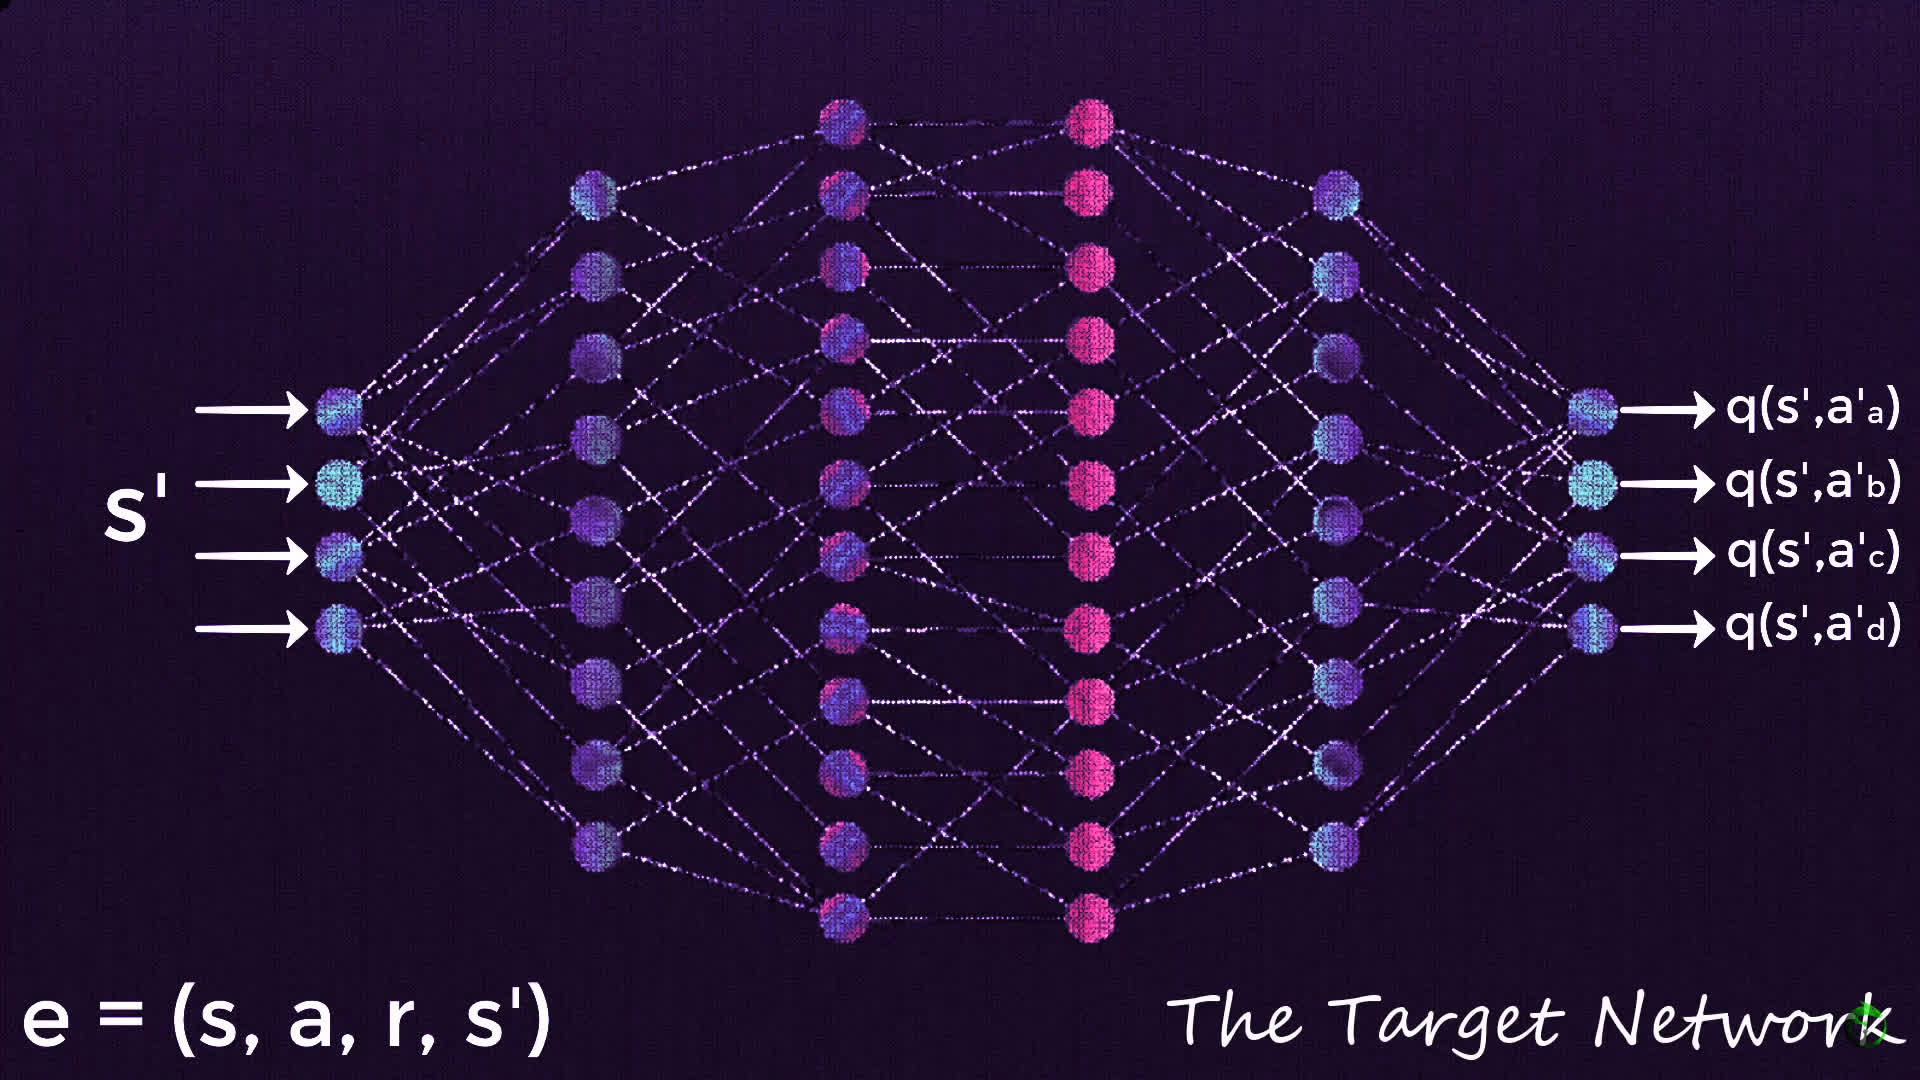

<font size="3">Once, loss is calculated. Use optimizers like SGD or Adam to minimize this loss. In essence, network outputs Q-value that approximates the Target Q-value
    
The target network updates its weights after certain amount of steps 

## Summary

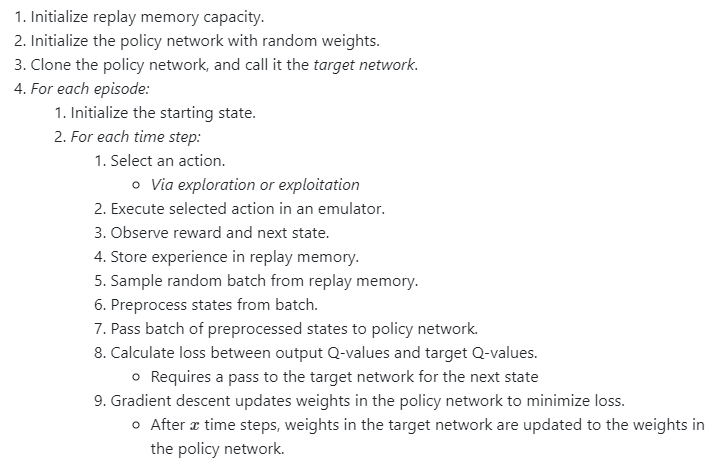

Ref: https://deeplizard.com/